
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [18]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


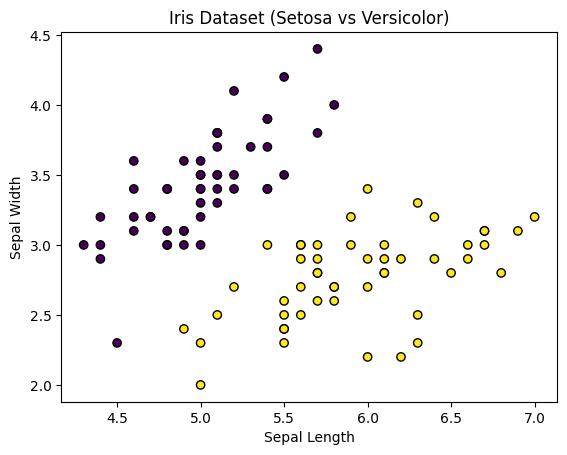

In [19]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

#### Splitting

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

#### Fit a KNeighborsClassifier

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().set_output(transform = 'pandas')
scaler

MinMaxScaler()

In [22]:
X_train_transformed = scaler.fit_transform(X_train)
X_train_transformed.head()

,x0,x1
0,0.518519,1.000000
1,0.962963,0.458333
2,0.259259,0.000000
3,0.481481,0.416667
4,0.703704,0.083333


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_transformed,y_train)


KNeighborsClassifier(n_neighbors=3)

In [37]:
X_test_transformed = scaler.transform(X_test)
X_test_transformed.head()

,x0,x1
0,0.222222,0.166667
1,0.888889,0.416667
2,0.666667,0.375000
3,0.777778,0.500000
4,0.259259,0.583333


####  Make the prediction 


In [38]:
y_pred = knn.predict(X_test_transformed)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0


## Task 4: Predictions for Different Values of k


In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed,y_train)
y_pred = knn.predict(X_test_transformed)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [29]:
accuracy_score(y_pred,y_test)

1.0

In [30]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_transformed,y_train)
y_pred = knn.predict(X_test_transformed)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [31]:
accuracy_score(y_pred,y_test)

1.0

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_transformed,y_train)
y_pred = knn.predict(X_test_transformed)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [33]:
accuracy_score(y_pred,y_test)

1.0


## Task 5: Decision Boundary Function (Provided)


In [44]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


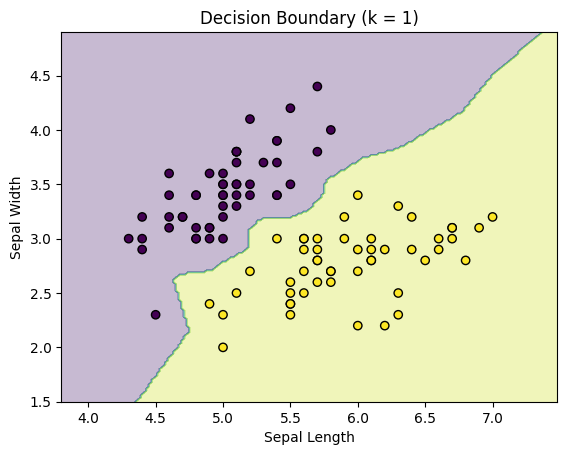

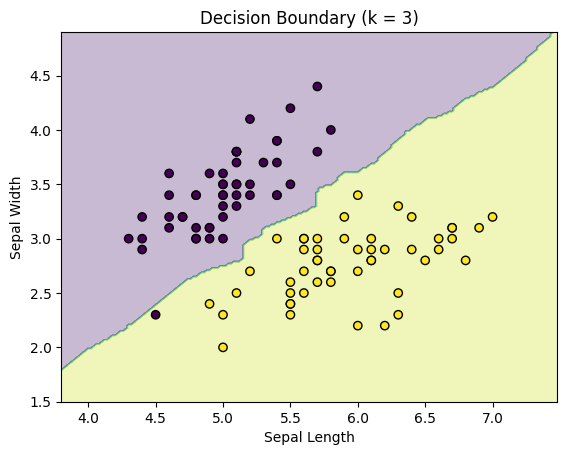

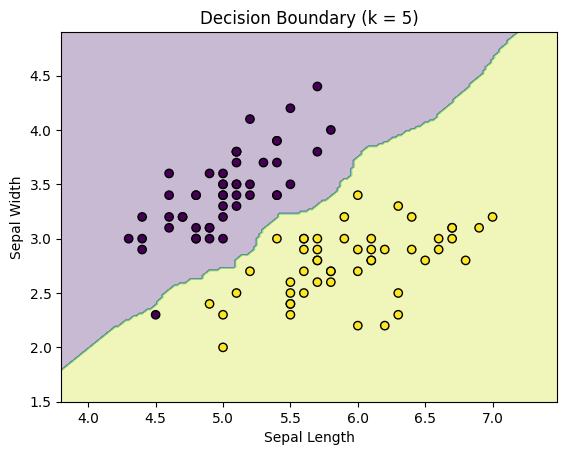

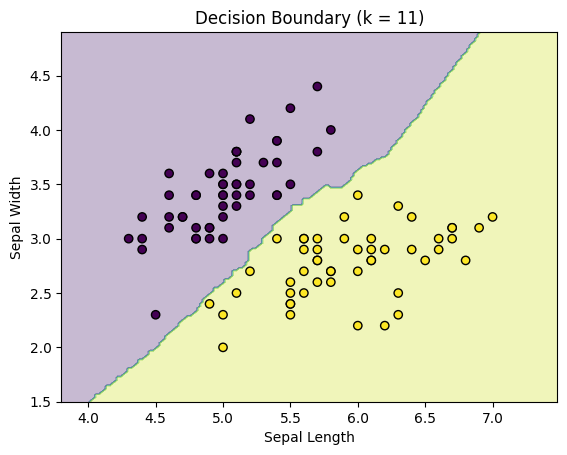

In [45]:

for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")



## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


In [ ]:
Plot a decision boundary when using k=5 and change the distance

In [127]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_euclidean.fit(X_train,y_train)
y_pred_eu = knn_euclidean.predict(X_test)
y_pred_eu

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

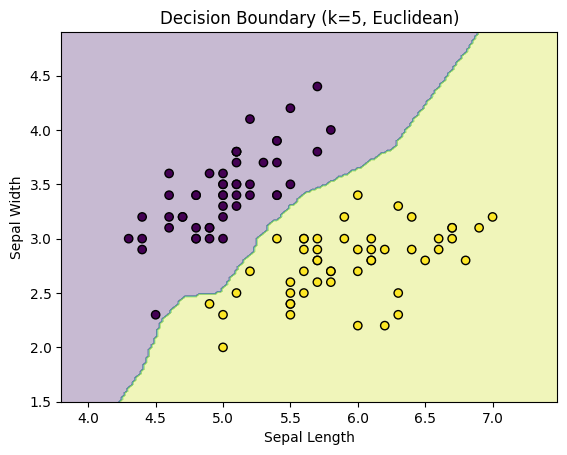

In [128]:
plot_decision_boundary(knn_euclidean,X,y,title="Decision Boundary (k=5, Euclidean)")


In [116]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn_manhattan.fit(X_train,y_train)
y_pred_man = knn_euclidean.predict(X_test)
y_pred_man

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

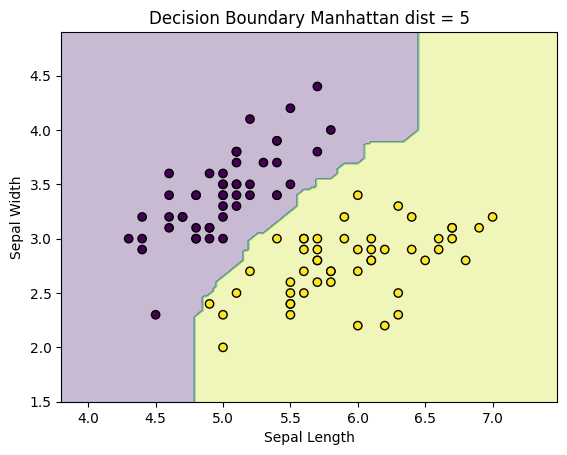

In [117]:
plot_decision_boundary(knn_manhattan,X, y, title="Decision Boundary Manhattan dist = 5")

In [107]:
y_pred_eu-y_pred_man  #both distances are same 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?


1. As k value increases prediction become more accurate
2. k = 1
3. k = 1 means of predicting the class of query point with only one neighrest neighbour ,it is not accurate , nonlinear in nature
4. Distance metric defines similarity , how the classification is made based on the two features,if the give query point is near to the 0 class points than it can be assigned to class 0 ,based on distance metric
5. I chooseK Euclidean dist with k=5-10 ,There is only two features less-dimensional data euclidean distance is suitable. 